### 2. zadatak (12 poena)

Potrebno je implementirati autoenkoder koji uči reprezentacije slika skupa `fashion_mnist` u kojem se nalaze slike odevnih predmeta. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [3]:
from sklearn import metrics

a) Koristeći funkciju `load_data` paketa `fashion_mnist` učitati sličice skupa za treniranje i skupa za testiranje.

In [4]:
(X_train_original, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_original.shape

(60000, 28, 28)

b) Iz učitanog skupa za treniranje izdvojiti prvih 30000 sličica za treniranje, a potom narednih 10000 sličica za validaciju.

In [6]:
X_train = X_train_original[0:30000, :, :]

In [7]:
X_train.shape

(30000, 28, 28)

In [8]:
X_valid = X_train_original[30000:40000, :, :]

In [9]:
X_valid.shape

(10000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

c) Učitane sličice transformisati u tip float32, a potom izvršiti njihovu normalizaciju.

In [11]:
X_train = X_train.astype('float32') / 255.
X_valid = X_valid.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [12]:
latent_dim = 64

d) Napraviti autoenkoder mrežu kod koje se enkoder sastoji od prvog sloja koji vrši ispravljanje učitane slike i jednog gustog sloja latentne dimenzije 64 sa ReLu aktivacijom, a dekoder od gustog sloja dimenzije 784 sa sigmoidnom aktivacijom i sloja koji vrši transformaciju slike na polaznu dimenziju. Potom mreži pridružiti Adam optimizator i srednjekvadratnu grešku kao funkciju gubitka. 

In [13]:
encoder_decoder = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(latent_dim, activation='relu'),
    layers.Dense(784, activation='sigmoid'),
    layers.Reshape((28, 28))
])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
encoder_decoder.compile(optimizer='adam', loss='mse')

Instructions for updating:
Use tf.cast instead.


e) Trenirati mrežu u 10 epoha koristeći za validaciju pripremljene podatke. Parametar `shuffle` postaviti na vrednost True. Veličinu paketića za treniranje postaviti na 32.

In [15]:
history = encoder_decoder.fit(X_train, X_train, batch_size=32, epochs=10, shuffle=True, validation_data=(X_valid, X_valid))

Train on 30000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
30000/30000 [==============================] - 4s 118us/sample - loss: 0.0321 - val_loss: 0.0182
Epoch 2/10
30000/30000 [==============================] - 3s 111us/sample - loss: 0.0151 - val_loss: 0.0131
Epoch 3/10
30000/30000 [==============================] - 3s 106us/sample - loss: 0.0122 - val_loss: 0.0114
Epoch 4/10
30000/30000 [==============================] - 3s 99us/sample - loss: 0.0110 - val_loss: 0.0105
Epoch 5/10
30000/30000 [==============================] - 3s 105us/sample - loss: 0.0103 - val_loss: 0.0101
Epoch 6/10
30000/30000 [==============================] - 3s 98us/sample - loss: 0.0098 - val_loss: 0.0097
Epoch 7/10
30000/30000 [==============================] - 3s 106us/sample - loss: 0.0096 - val_loss: 0.0095
Epoch 8/10
30000/30000 [==============================] - 3s 98us/sample - loss: 0.0094 - val_loss: 0.0094
Epoch 9/10
30000/30000 [=================

f) Prikazati grafik funkcije gubitak u toku treniranja na skupu za treniranje i skupu za validaciju.

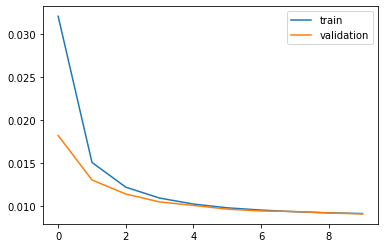

In [16]:
plt.plot(np.arange(0, 10), history.history['loss'], label='train')
plt.plot(np.arange(0, 10), history.history['val_loss'], label='validation')
plt.legend(loc='best')

g) Prikazati za proizvoljnu sliku skupa za testiranje kako radi autoenkoder.

In [17]:
X_predicted = encoder_decoder.predict(X_test)

In [18]:
X_predicted[0].shape

(28, 28)

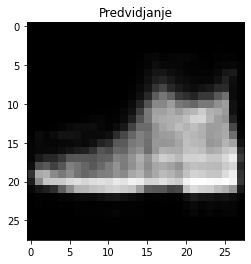

In [19]:
plt.title('Predvidjanje')
plt.imshow(X_predicted[0], cmap='gray')
plt.show()

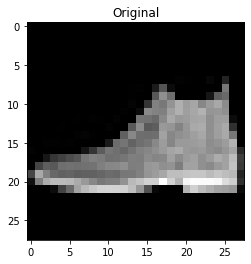

In [20]:
plt.title('Original')
plt.imshow(X_test[0], cmap='gray')
plt.show()

h) Dati ocenu srednjekvadratne greške autoenkodera na skupu za testiranje. 

In [21]:
encoder_decoder.evaluate(X_test, X_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.0092


0.009192644216120243

In [22]:
encoder_decoder.metrics_names

['loss']